# Exportación de librerias

In [115]:
#Importación de librerias
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [103]:
df = pd.read_csv('Bases de datos agregada/prest_agr_2025.csv')
# Corrección de algunas inconsistencias
df['depa_nombre'] = df['depa_nombre'].replace({
    'CALI': 'VALLE DEL CAUCA',
    'BUENAVENTURA': 'VALLE DEL CAUCA',
    'BARRANQUILLA': 'ATLANTICO',
    'SANTA MARTA': 'MAGDALENA'
})
df

,depa_nombre,muni_nombre,total_prestadores,profesional_independiente,ips,objeto_social_diferente,transporte_especial,natural,juridico,privada,...,mujeres_infancia,mujeres_adolescencia,mujeres_juventud,mujeres_adultez,mujeres_vejez,etnia_cabecera,etnia_cprd,etnia_total,superficie,region
0,AMAZONAS,LETICIA,57,43,12,2,0,43,14,54,...,3361,3439,4658,10827,2235,11973,13737,25710,5717.713561,Región Centro Sur
1,ANTIOQUIA,ABEJORRAL,13,11,1,1,0,11,2,12,...,841,854,1074,4459,2387,78,8,86,497.566212,Región Eje Cafetero
2,ANTIOQUIA,ALEJANDRÍA,1,0,1,0,0,0,1,0,...,217,185,262,1077,553,15,1,16,119.467683,Región Eje Cafetero
3,ANTIOQUIA,AMAGÁ,22,19,2,1,0,19,3,21,...,1222,1279,2115,7853,3069,163,18,181,89.245903,Región Eje Cafetero
4,ANTIOQUIA,AMALFI,15,13,2,0,0,13,2,14,...,1413,1429,1898,6126,2030,131,20,151,1301.657433,Región Eje Cafetero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,VAUPÉS,MITÚ,8,2,2,2,2,2,6,7,...,2613,2783,3439,4443,1157,6964,23993,30957,16089.802954,Región Llano
945,VICHADA,CUMARIBO,4,1,3,0,0,1,3,4,...,6171,6101,7667,13461,2549,1273,77907,79180,64509.421614,Región Llano
946,VICHADA,LA PRIMAVERA,3,3,0,0,0,3,0,3,...,629,669,926,2246,513,497,1881,2378,18188.762851,Región Llano
947,VICHADA,PUERTO CARREÑO,24,20,4,0,0,20,4,23,...,1098,1155,2018,4920,976,3631,2940,6571,12175.639571,Región Llano


In [104]:
print(df.columns.tolist())

['depa_nombre', 'muni_nombre', 'total_prestadores', 'profesional_independiente', 'ips', 'objeto_social_diferente', 'transporte_especial', 'natural', 'juridico', 'privada', 'mixta', 'publica', 'vencimiento_2025', 'vencimiento_2026', 'vencimiento_2027', 'vencimiento_2028', 'vencimiento_2029', 'municipio_pdet', 'municipio_zomac', 'municipio_pnis', 'municipio_pnsr_antes_2023', 'municipio_pnsr_2023', 'municipio_pnsr_2024', 'muni_nombre_corr', 'depa_nombre_corr', 'MPIO', 'depa_nombre:1', 'muni_nombre:1', 'AÑO', 'total_pob', 'total_cabecera', 'total_cprd', 'hombres_cabecera', 'hombres_cprd', 'hombres_total', 'mujeres_cabecera', 'mujeres_cprd', 'mujeres_total', 'hombres_primera_infancia', 'hombres_infancia', 'hombres_adolescencia', 'hombres_juventud', 'hombres_adultez', 'hombres_vejez', 'mujeres_primera_infancia', 'mujeres_infancia', 'mujeres_adolescencia', 'mujeres_juventud', 'mujeres_adultez', 'mujeres_vejez', 'etnia_cabecera', 'etnia_cprd', 'etnia_total', 'superficie', 'region']


## Análisis descriptivo

In [105]:
tipos = ['profesional_independiente', 'ips', 'objeto_social_diferente', 'transporte_especial']

# Inicializar tabla
cruce = pd.DataFrame(index=['Natural', 'Jurídico'], columns=tipos)

# Total nacional por naturaleza jurídica (usando proporción por fila, porque no hay cruce exacto)
for tipo in tipos:
    # Evitar división por cero
    proporciones = df[['natural', 'juridico']].div(df['natural'] + df['juridico'], axis=0).fillna(0)
    
    cruce.loc['Natural', tipo] = (df[tipo] * proporciones['natural']).sum()
    cruce.loc['Jurídico', tipo] = (df[tipo] * proporciones['juridico']).sum()

# Redondear y convertir a enteros
cruce = cruce.round(0).astype(int)

print(cruce)

          profesional_independiente   ips  objeto_social_diferente  \
Natural                       35510  6978                     1001   
Jurídico                       8306  3105                      298   

          transporte_especial  
Natural                   313  
Jurídico                  130  


In [106]:
# Definimos las columnas para naturaleza jurídica
naturaleza_cols = ['natural', 'juridico']

# Sumamos por naturaleza jurídica
total_naturaleza = df_grouped[naturaleza_cols].sum()
total_naturaleza_sorted = total_naturaleza.sort_values(ascending=True)  # Para gráfico horizontal con barras de abajo hacia arriba

plt.figure(figsize=(8,5))
bars = total_naturaleza_sorted.plot(kind='barh', color='skyblue')
plt.title("Distribución nacional por naturaleza jurídica")
plt.xlabel("Total de prestadores")
plt.ylabel("Naturaleza jurídica")

total_sum = total_naturaleza_sorted.sum()
for bar in bars.patches:
    width = bar.get_width()
    porcentaje = (width / total_sum) * 100
    plt.text(width + total_sum*0.01, bar.get_y() + bar.get_height()/2, f'{porcentaje:.1f}%', va='center')

plt.tight_layout()
plt.savefig("distribucion_nacional_naturaleza_juridica_horizontal.png", dpi=300)
plt.show()

# Ahora para tipo de propiedad
propiedad_cols = ['privada', 'mixta', 'publica']

total_propiedad = df_grouped[propiedad_cols].sum()
total_propiedad_sorted = total_propiedad.sort_values(ascending=True)

plt.figure(figsize=(8,5))
bars = total_propiedad_sorted.plot(kind='barh', color='skyblue')
plt.title("Distribución nacional por tipo de propiedad")
plt.xlabel("Total de prestadores")
plt.ylabel("Tipo de propiedad")

total_sum = total_propiedad_sorted.sum()
for bar in bars.patches:
    width = bar.get_width()
    porcentaje = (width / total_sum) * 100
    plt.text(width + total_sum*0.01, bar.get_y() + bar.get_height()/2, f'{porcentaje:.1f}%', va='center')

plt.tight_layout()
plt.savefig("Gráficos y tablas/distribucion_nacional_tipo_propiedad_horizontal.png", dpi=300)
plt.show()

KeyError: "None of [Index(['natural', 'juridico'], dtype='object')] are in the [columns]"

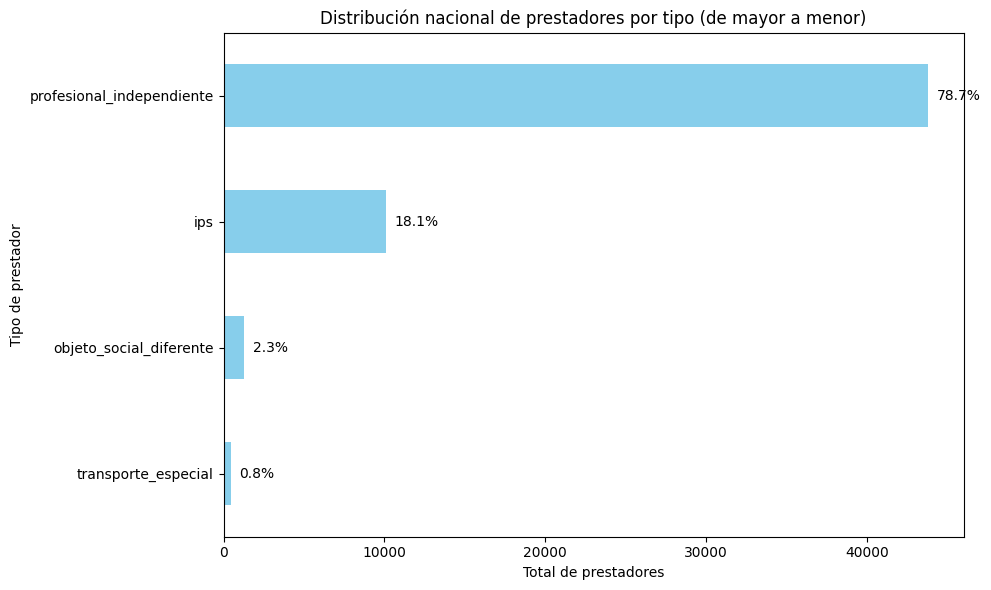

In [ ]:
total_por_tipo = df_grouped[tipos_prestadores].sum()
# Gráfico 1: Distribución nacional por tipo de prestador
plt.figure(figsize=(10,6))
total_por_tipo_sorted = total_por_tipo.sort_values(ascending=True)  # Ascendente para barras horizontales

bars = total_por_tipo_sorted.plot(kind='barh', color='skyblue')

plt.title("Distribución nacional de prestadores por tipo (de mayor a menor)")
plt.xlabel("Total de prestadores")
plt.ylabel("Tipo de prestador")

# Calcular porcentaje de cada barra
total_sum = total_por_tipo_sorted.sum()

for bar in bars.patches:
    width = bar.get_width()
    porcentaje = (width / total_sum) * 100
    plt.text(width + total_sum*0.01, bar.get_y() + bar.get_height()/2, f'{porcentaje:.1f}%', va='center')

plt.tight_layout()
plt.savefig("Gráficos y tablas/distribucion_nacional_tipo_prestador_horizontal_con_porcentaje.png", dpi=300)
plt.show()

## Análisis departamental

In [ ]:
df['depa_nombre'] = df['depa_nombre'].str.strip()
df_grouped = df.groupby('depa_nombre').sum(numeric_only=True)
df_grouped

,total_prestadores,profesional_independiente,ips,objeto_social_diferente,transporte_especial,natural,juridico,privada,mixta,publica,...,mujeres_primera_infancia,mujeres_infancia,mujeres_adolescencia,mujeres_juventud,mujeres_adultez,mujeres_vejez,etnia_cabecera,etnia_cprd,etnia_total,superficie
depa_nombre,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,57,43,12,2,0,43,14,54,0,3,...,3309,3361,3439,4658,10827,2235,11973,13737,25710,5717.713561
ANTIOQUIA,11410,10060,992,327,31,10058,1352,11272,5,133,...,246795,272643,277772,468805,1652132,663110,277138,132308,409446,61611.364713
ARAUCA,227,166,53,6,2,166,61,221,1,5,...,15568,16547,15871,22984,67990,17549,9397,13589,22986,17445.345901
ATLANTICO,1879,1288,559,21,11,1285,594,1874,1,4,...,51400,58697,59653,95733,307524,123963,72332,9,72341,161.872561
ATLÁNTICO,594,344,234,7,9,344,250,569,0,25,...,65761,74559,73720,111183,330954,101794,105674,40767,146441,3119.880167
BOGOTÁ DC,13758,11895,1514,309,40,11894,1864,13733,2,23,...,268569,279403,270955,533668,2040424,742848,97208,502,97710,1766.442724
BOLÍVAR,387,210,161,13,3,209,178,348,0,39,...,55861,61653,59891,81831,227192,79030,79996,85910,165906,25150.774363
BOYACÁ,1599,1209,340,39,11,1209,390,1494,0,105,...,46907,52899,55515,81951,278030,123477,4613,7127,11740,19880.027191
CALDAS,1474,1214,223,25,12,1213,261,1437,3,34,...,34516,38855,39585,66493,242364,121628,30272,48496,78768,7479.863987


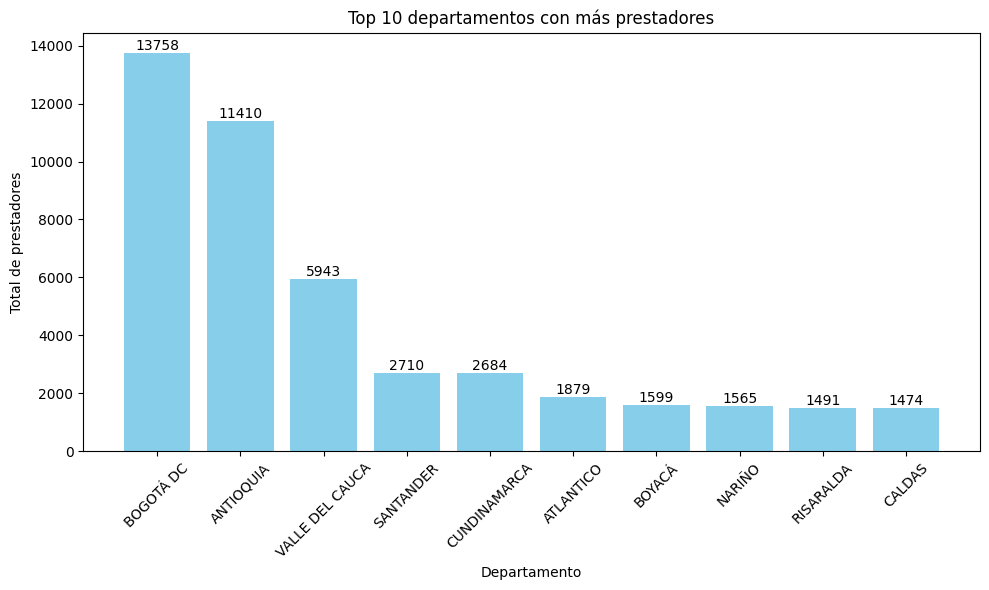

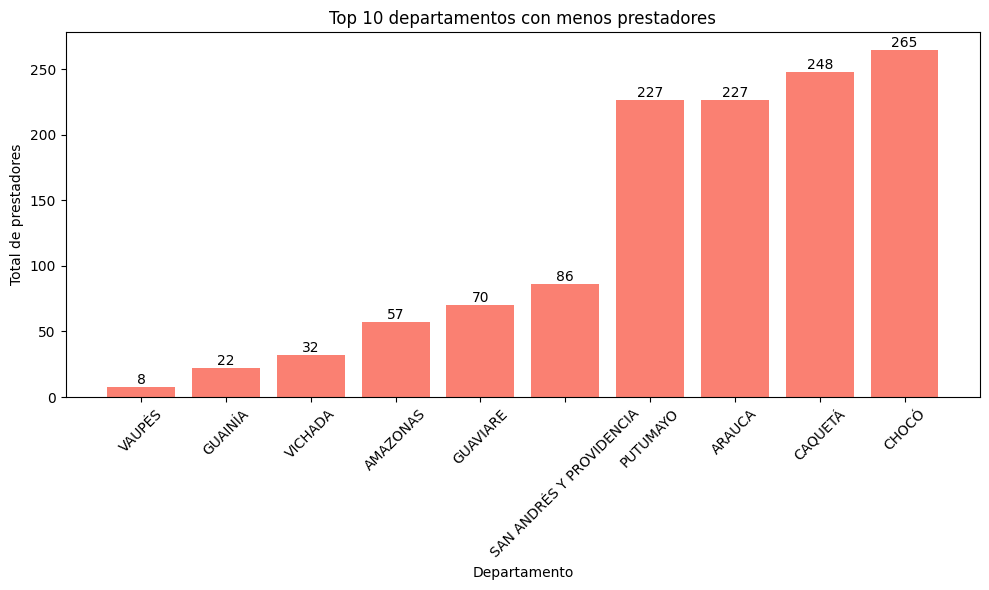

In [ ]:
grouped = df_grouped['total_prestadores'].sort_values()
# Top 10 más
top10_mas = grouped.tail(10).sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(top10_mas.index, top10_mas.values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Top 10 departamentos con más prestadores")
plt.xlabel("Departamento")
plt.ylabel("Total de prestadores")
plt.tight_layout()
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')
plt.savefig("top10_mas_prestadores.png", dpi=300) 
plt.show()

# Top 10 menos
top10_menos = grouped.head(10)
plt.figure(figsize=(10,6))
bars = plt.bar(top10_menos.index, top10_menos.values, color="salmon")
plt.xticks(rotation=45)
plt.title("Top 10 departamentos con menos prestadores")
plt.xlabel("Departamento")
plt.ylabel("Total de prestadores")
plt.tight_layout()
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')
plt.savefig("Gráficos y tablas/top10_menos_prestadores.png", dpi=300) 
plt.show()

In [ ]:
df["total_prestadores"] = pd.to_numeric(df["total_prestadores"], errors="coerce")
df["total_pob"] = pd.to_numeric(df["total_pob"], errors="coerce")

# Agrupar por departamento
df_grouped = df.groupby("depa_nombre")[["total_prestadores", "total_pob"]].sum()

# Calcular tasa por cada 10.000 habitantes
df_grouped["prestadores_por_10mil"] = (df_grouped["total_prestadores"] / df_grouped["total_pob"]) * 10000

# Ordenar de mayor a menor
df_sorted = df_grouped.sort_values("prestadores_por_10mil", ascending=False)

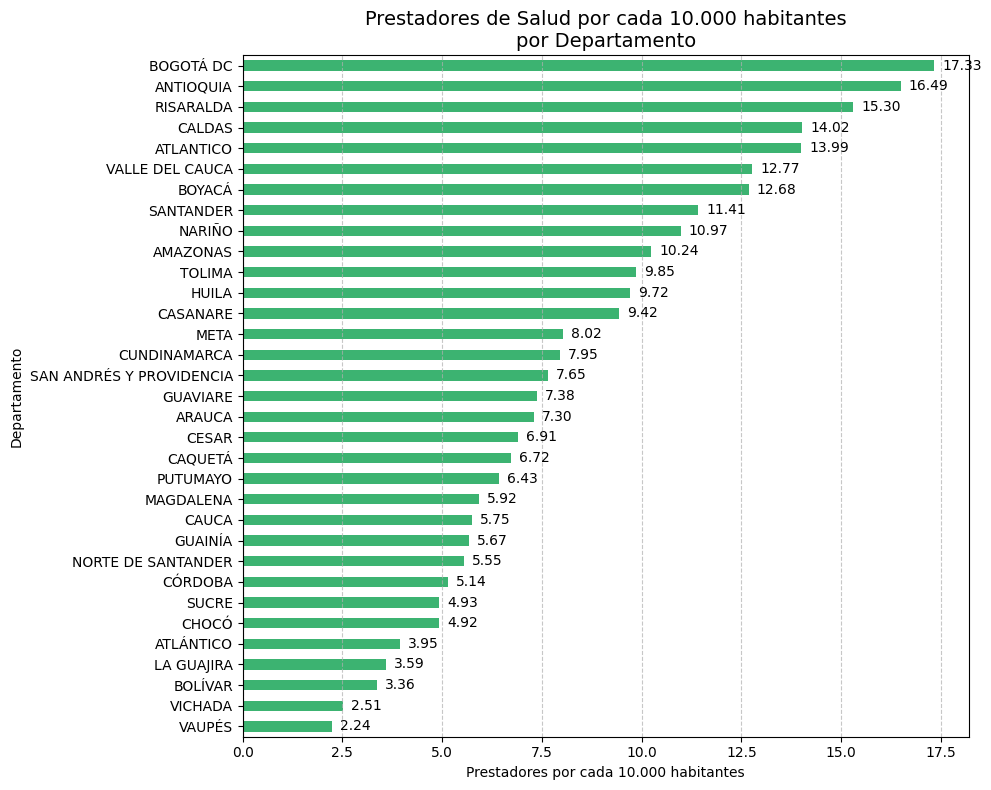

In [ ]:
plt.figure(figsize=(10, 8))
bars = df_sorted["prestadores_por_10mil"].plot(kind="barh", color="mediumseagreen")

plt.title("Prestadores de Salud por cada 10.000 habitantes\npor Departamento", fontsize=14)
plt.xlabel("Prestadores por cada 10.000 habitantes")
plt.ylabel("Departamento")

# Mostrar los valores al lado de las barras
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va="center")

plt.gca().invert_yaxis()  # De mayor a menor
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("Gráficos y tablas/Prestadores de Salud por cada 10.000 habitantes por Departamento.png", dpi=300)
plt.show()

## Análisis vencimiento registros

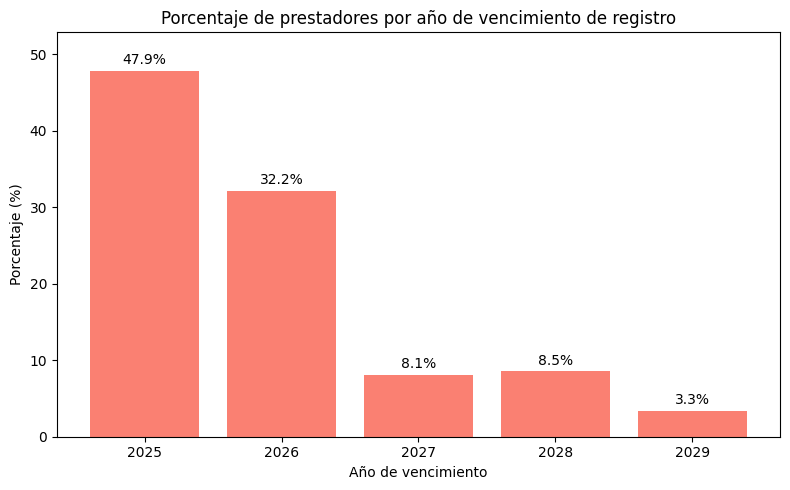

In [110]:
# Columnas de vencimiento
vencimiento_cols = ['vencimiento_2025', 'vencimiento_2026', 'vencimiento_2027', 'vencimiento_2028', 'vencimiento_2029']

# Sumar totales por año
total_por_vencimiento = df[vencimiento_cols].sum()

# Calcular porcentaje sobre el total de vencimientos
total_general = total_por_vencimiento.sum()
porcentaje_por_vencimiento = (total_por_vencimiento / total_general) * 100

# Gráfico de barras verticales con porcentaje
plt.figure(figsize=(8,5))
bars = plt.bar(porcentaje_por_vencimiento.index.str[-4:], porcentaje_por_vencimiento.values, color='salmon')

plt.title("Porcentaje de prestadores por año de vencimiento de registro")
plt.xlabel("Año de vencimiento")
plt.ylabel("Porcentaje (%)")

# Añadir etiquetas con porcentaje en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.ylim(0, porcentaje_por_vencimiento.max() + 5)
plt.tight_layout()
plt.savefig("Gráficos y tablas/Vencimiento de registros.png", dpi=300)
plt.show()

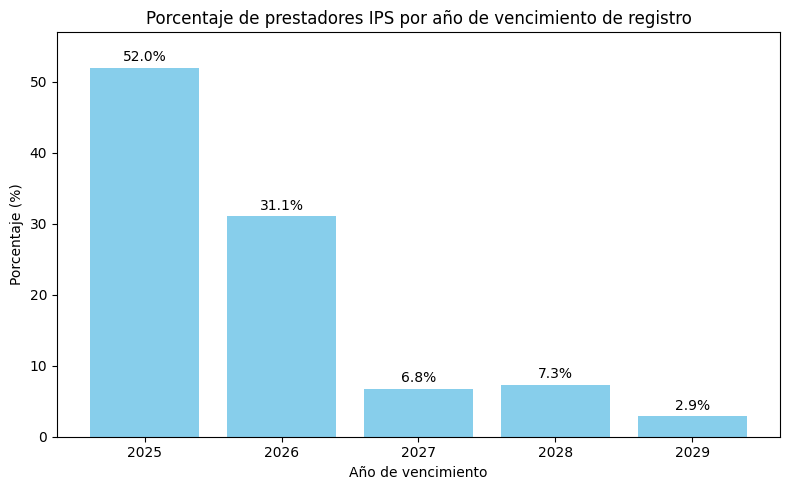

In [111]:
# Columnas de vencimiento
vencimiento_cols = ['vencimiento_2025', 'vencimiento_2026', 'vencimiento_2027', 'vencimiento_2028', 'vencimiento_2029']

# Filtrar solo IPS (o cambia 'ips' por el tipo que quieras analizar)
df_ips = df[['ips'] + vencimiento_cols].copy()

# Multiplicar cada columna de vencimiento por la cantidad de prestadores IPS para ponderar el vencimiento por prestadores IPS
# Aquí asumimos que el vencimiento es el conteo de prestadores (puede que tengas que ajustar según tus datos)
for col in vencimiento_cols:
    df_ips[col] = df_ips[col] * df_ips['ips']

# Sumar totales por año para IPS
total_por_vencimiento_ips = df_ips[vencimiento_cols].sum()

# Calcular porcentaje sobre el total de vencimientos IPS
total_general_ips = total_por_vencimiento_ips.sum()
porcentaje_por_vencimiento_ips = (total_por_vencimiento_ips / total_general_ips) * 100

# Gráfico de barras verticales con porcentaje para IPS
plt.figure(figsize=(8,5))
bars = plt.bar(porcentaje_por_vencimiento_ips.index.str[-4:], porcentaje_por_vencimiento_ips.values, color='skyblue')

plt.title("Porcentaje de prestadores IPS por año de vencimiento de registro")
plt.xlabel("Año de vencimiento")
plt.ylabel("Porcentaje (%)")

# Añadir etiquetas con porcentaje en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.ylim(0, porcentaje_por_vencimiento_ips.max() + 5)
plt.tight_layout()
plt.savefig("Gráficos y tablas/Vencimiento de registros IPS.png", dpi=300)
plt.show()